#Start

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="U8zkXwH3JFcz2xPg9IRu")
project = rf.workspace("texxn").project("tesla-model-classifier")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tesla-Model-Classifier-1 in folder:: 100%|██████████| 2919/2919 [00:00<00:00, 4851.50it/s]


In [16]:
!pip install tensorflow_hub # install tensorflow_hub
import tensorflow_hub as hub # import tensorflow_hub to use KerasLayer
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 # Import cv2 directly
import os

In [4]:
class_names = os.listdir("dataset/train")
print(class_names)

['Model_Y', 'Model_E', 'Model_S', 'Model_X']


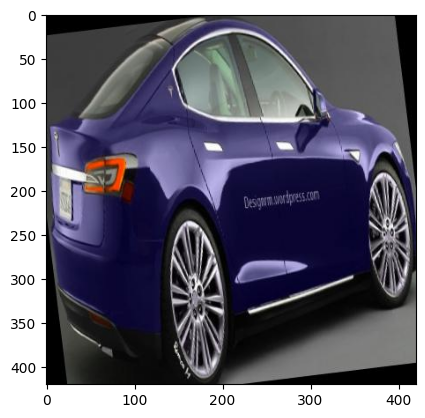

In [5]:
img=mpimg.imread('/content/dataset/train/Model_E/12841435333_c9c9547899_o_jpg.rf.f3418c7e7adb01701d1831f23dadf7b1.jpg')
imgplot=plt.imshow(img)


#Training

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub # import tensorflow_hub to use KerasLayer
import tensorflow as tf # importing tensorflow



In [38]:
img_size = (224 , 224)
batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/train",
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"  # Ensures labels are one-hot encoded
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/valid",
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"  # Fixes the shape mismatch issue
)


Found 2685 files belonging to 4 classes.
Found 222 files belonging to 4 classes.


In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_dir = Path('/content/dataset/valid')
test_dir = Path('/content/dataset/valid')

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32, class_mode = 'categorical', seed = 42)
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size = 32, class_mode = 'categorical', seed = 42)

Found 222 images belonging to 4 classes.
Found 222 images belonging to 4 classes.


In [40]:
mobilenet_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1"

resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1"
#efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-classification/2"
#mobilenet_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1"

In [41]:
from tensorflow.keras import layers
import tensorflow_hub as hub
import tf_keras as keras
IMAGE_SHAPE = (224,224)
def create_model(model_url, num_classes):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))


  model = keras.Sequential([
    feature_extractor_layer,
    keras.layers.Dense(num_classes, activation='sigmoid', name='output_layer')

  ])
  return model

In [47]:
resnet_model = create_model(mobilenet_url, num_classes=4)

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





resnet_history = resnet_model.fit(train_data,
                                  epochs=50,
                                  steps_per_epoch=len(train_data),
                                  #validation_data=test_data,
                                  #validation_steps=len(test_data),
                                  verbose = 1)

Epoch 1/50
7/7 [==============================] - 6s 66ms/step - loss: 1.5209 - accuracy: 0.3018
Epoch 2/50
7/7 [==============================] - 1s 75ms/step - loss: 1.2619 - accuracy: 0.3874
Epoch 3/50
7/7 [==============================] - 1s 76ms/step - loss: 1.1383 - accuracy: 0.5045
Epoch 4/50
7/7 [==============================] - 1s 75ms/step - loss: 1.0130 - accuracy: 0.5901
Epoch 5/50
7/7 [==============================] - 1s 75ms/step - loss: 0.9307 - accuracy: 0.6441
Epoch 6/50
7/7 [==============================] - 0s 70ms/step - loss: 0.8630 - accuracy: 0.7252
Epoch 7/50
7/7 [==============================] - 1s 76ms/step - loss: 0.8053 - accuracy: 0.7252
Epoch 8/50
7/7 [==============================] - 1s 74ms/step - loss: 0.7455 - accuracy: 0.7928
Epoch 9/50
7/7 [==============================] - 1s 85ms/step - loss: 0.7054 - accuracy: 0.8514
Epoch 10/50
7/7 [==============================] - 1s 97ms/step - loss: 0.6566 - accuracy: 0.8378
Epoch 11/50
7/7 [============

In [63]:
resnet_model.save("car_model_classifier.h5")

In [65]:
import tensorflow as tf # import tensorflow
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)

In [66]:
# prompt: save it as tflite

tflite_model = converter.convert()
with open('car_model_classifier.tflite', 'wb') as f:
  f.write(tflite_model)
